# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [17]:
import pandas as pd
import scipy.stats as stats 

df = pd.read_csv('data/human_body_temperature.csv')
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [18]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


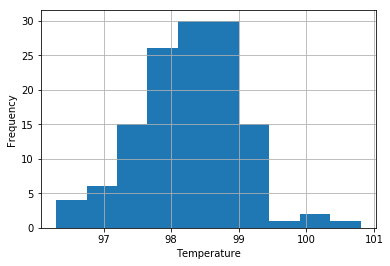

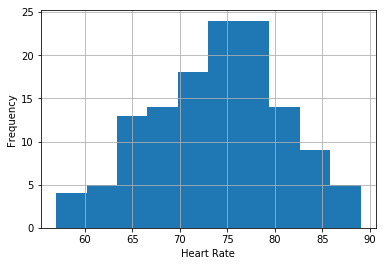

In [19]:
import matplotlib.pyplot as plt 
df.temperature.hist()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

df.heart_rate.hist()
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [20]:
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

In [21]:
import scipy.stats as stats
stats.normaltest(df.temperature)
# since the value of p is 0.258, we cannot reject the null hypothesis that is that the data is normal.  

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

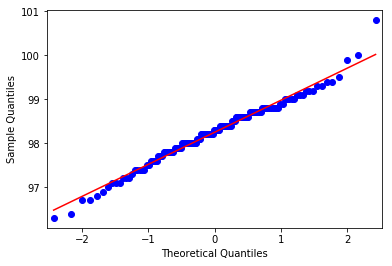

In [22]:
# Quantile-Quantile Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df.temperature, line='s')
pyplot.show()

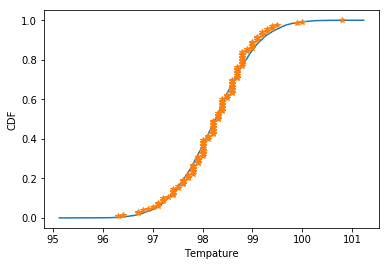

In [23]:
# CDF 
import numpy as np
import matplotlib.pyplot as plt

def cdf(data):
    # Number of data points: n
    n = len(data)

    # x-data for the CDF: x
    x = np.sort(data)

    # y-data for the CDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Sample mean/std
mean = np.mean(df.temperature)
std  = np.std(df.temperature)
# Sampleing the normal distribution with above mean and std
normal = np.random.normal(mean, std, 10000)
# CDF of the sample and theoretical distributions
x, y = cdf(df.temperature)
x_norm, y_norm = cdf(normal)
# Plot
plt.plot(x_norm, y_norm)
plt.plot(x, y, marker='*', ls='none')
plt.xlabel('Tempature')
plt.ylabel('CDF')
plt.show()
# From graph below for CDF along with P- test and q-q test, its safe to say temperature data is normally distributed.

In [24]:
# Question 2
# Asnwer: Yes the sample size is large enough because the usual threshold for sample size is 30 and we have 130 observation. 
# Also for sample being independent, it is safe to assume it was different people.

In [25]:
df_temp_means = np.empty(1000)

for i in range(1000):
    sample_temp=np.random.choice(df.temperature,size=130)
    df_temp_means[i]=np.mean(df.temperature)
    
np.mean(df_temp_means)

98.24923076923075

We would use one-sample test because the sample set is to be tested against population mean and there is one population for the mean . Z-Test would have been appropraite but we dont have the variance for the population. So, t-test will be more appropriate here. 

In [26]:
# Question 3
# Is the true population mean really 98.6 degrees F?
# First, try a bootstrap hypothesis test.
# Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
# In this situation, is it appropriate to use the  tt  or  zz  statistic?
# Now try using the other test. How is the result be different? Why?
# T-test
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [27]:
# Since the p-value is really small, T-test proves that our mean temperature is not 98.6 F
# Now lets try the t-test manually and compare with scipy.stats function
ordered_temps = df.temperature.sort_values()
import scipy.stats 
sample_mean = ordered_temps.mean()
pop_mean = 98.6
sample_std = ordered_temps.std()
sample_size = len(ordered_temps)

# calculate t-score
t_score = (sample_mean - pop_mean)/(sample_std/np.sqrt(sample_size))

# calculate p-value
pvalue = scipy.stats.t.sf(np.abs(t_score), sample_size-1)*2

print("t-score: " + str(t_score) + "\np-value: " + str(pvalue))

t-score: -5.454823292364301
p-value: 2.4106320415585427e-07


In [28]:
# Lets try z-test now
import scipy.stats 
z_score = (sample_mean - pop_mean)/(sample_std)

# calculate p-value
pvalue_z = scipy.stats.norm.sf(abs(z_score))*2

print("z-score: " + str(z_score) + "\np-value: " + str(pvalue_z))

z-score: -0.4784196512470882
p-value: 0.6323515496610721


The z-statistics is showing that we should not reject our null hypothesis which is that sample mean is equal to population mean. It gives a different answer from T-statistic. However, T-test is more approriate here and the result of t-test are chosen. 

In [29]:
# Question 4
# Draw a small sample of size 10 from the data and repeat both frequentist tests.
# Which one is the correct one to use?
# What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [32]:
# take a random sample of 10 data points
sample = np.random.choice(ordered_temps, size=10)

# assign values needed for formulas
mu = ordered_temps.mean()
std = ordered_temps.std()
mean_10 = sample.mean()
std_10 = sample.std()

# calculate z- and t-scores
z_10 = (mean_10 - mu)/(std)
p_value_z10=scipy.stats.norm.sf(abs(z_10))*2
#t_10 = (mean_10 - mu)/(std/np.sqrt(10))
t_10=scipy.stats.ttest_1samp(sample,98.6)

print("z-score: " + str(z_10) + "\np_value_z: " + str(p_value_z10) + "\nt-score: " + str(t_10) )

z-score: 0.3420280840056016
p_value_z: 0.732329757435594
t-score: Ttest_1sampResult(statistic=-0.4532984139115999, pvalue=0.6610651472123368)


In [52]:
# Question 5
# At what temperature should we consider someone's temperature to be "abnormal"?
# As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
# Start by computing the margin of error and confidence interval. 
# When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, 
# and not N draws.

# sample mean and standard deviation for use with bootstrap and frequentist approaches below
x_bar = np.mean(df.temperature)
s = np.std(df.temperature)

# Bootstrap Approach 
temp_means = np.empty(1000)

for i in range(1000):
    samp_temp=np.random.choice(df.temperature,size=130)
    temp_means[i]=np.mean(df.temperature)
s=np.std(df.temperature)    
ci = scipy.stats.norm.interval(0.95, loc=x_bar, scale=s)
print("95% confidence Interval for Bootstrap: " + str(ci))

# frequentist approach - confidence interval for the one-sample t-test

# alpha = 0.05, confidence coefficient = 95%

# confidence interval for one draw
ci_low_f, ci_high_f = stats.norm.interval(0.95, loc=x_bar, scale=s)
print('95% confidence interval for Frequentist: ({:}, {:}) '.format(ci_low_f, ci_high_f))

95% confidence Interval for Bootstrap: (96.81775582674824, 99.68070571171332)
95% confidence interval for Frequentist: (96.81775582674824, 99.68070571171332) 


Both approaches gave the same 95% confidence interval and above or below these temperatures would be considered abnormal. 

Male Temp. Mean:  98.1046153846154 Male Temp. St. Dev.:  0.6933598841828696 Male Temp. Median:  98.1 
Female Temp. Mean:  98.39384615384613 Female Temp. St. Dev.:  0.7377464486428966 Female Temp. Median:  98.4


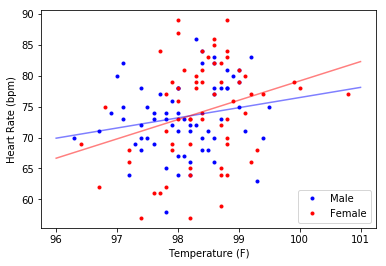

In [54]:
# Question 6 
# Is there a significant difference between males and females in normal temperature?
# What testing approach did you use and why?
# Write a story with your conclusion in the context of the original problem.


# split up data by gender
df_male = df[df['gender']=='M']
df_female = df[df['gender']=='F']

# prepare for creating best fit lines
temps = [96, 97, 98, 99, 100, 101]
male_line = np.empty(6)
female_line = np.empty(6)

# find slope and intercept for male and female data
slope_male, intercept_male = np.polyfit(df_male['temperature'], df_male['heart_rate'], 1)
slope_female, intercept_female = np.polyfit(df_female['temperature'], df_female['heart_rate'], 1)

# create y values for temps in range 96 - 101
for i in range(6):
    male_line[i] = (slope_male * temps[i]) + intercept_male
    female_line[i] = (slope_female * temps[i]) + intercept_female

# plot both males and females on same plot
_ = plt.plot(df_male['temperature'], df_male['heart_rate'], color='blue', marker='.', linestyle='none')
_ = plt.plot(df_female['temperature'], df_female['heart_rate'], color='red', marker='.', linestyle='none')

# plot best fit lines
_ = plt.plot(temps, male_line, color='blue', alpha=0.5)
_ = plt.plot(temps, female_line, color='red', alpha=0.5)

# label axes
plt.legend(('Male', 'Female'), loc='lower right')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Heart Rate (bpm)')



print("Male Temp. Mean: ", np.mean(df_male['temperature']), "Male Temp. St. Dev.: ", np.std(df_male['temperature']), 
      "Male Temp. Median: ", np.median(df_male['temperature']),
      "\nFemale Temp. Mean: ", np.mean(df_female['temperature']), "Female Temp. St. Dev.: ", np.std(df_female['temperature']),
      "Female Temp. Median: ", np.median(df_female['temperature']))

After plotting the data and checking the mean, median, and st.dev. of both males and females, it seems females are just a tad bit higher on average, with a slightly larger range as well. Overall, I would say that the data suggests that females experience slightly higher body temperatures, and even faster heart rates.